# Lesson 1 : Introduction to NLP

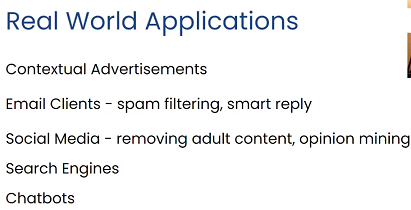

## Common NLP tasks :

## 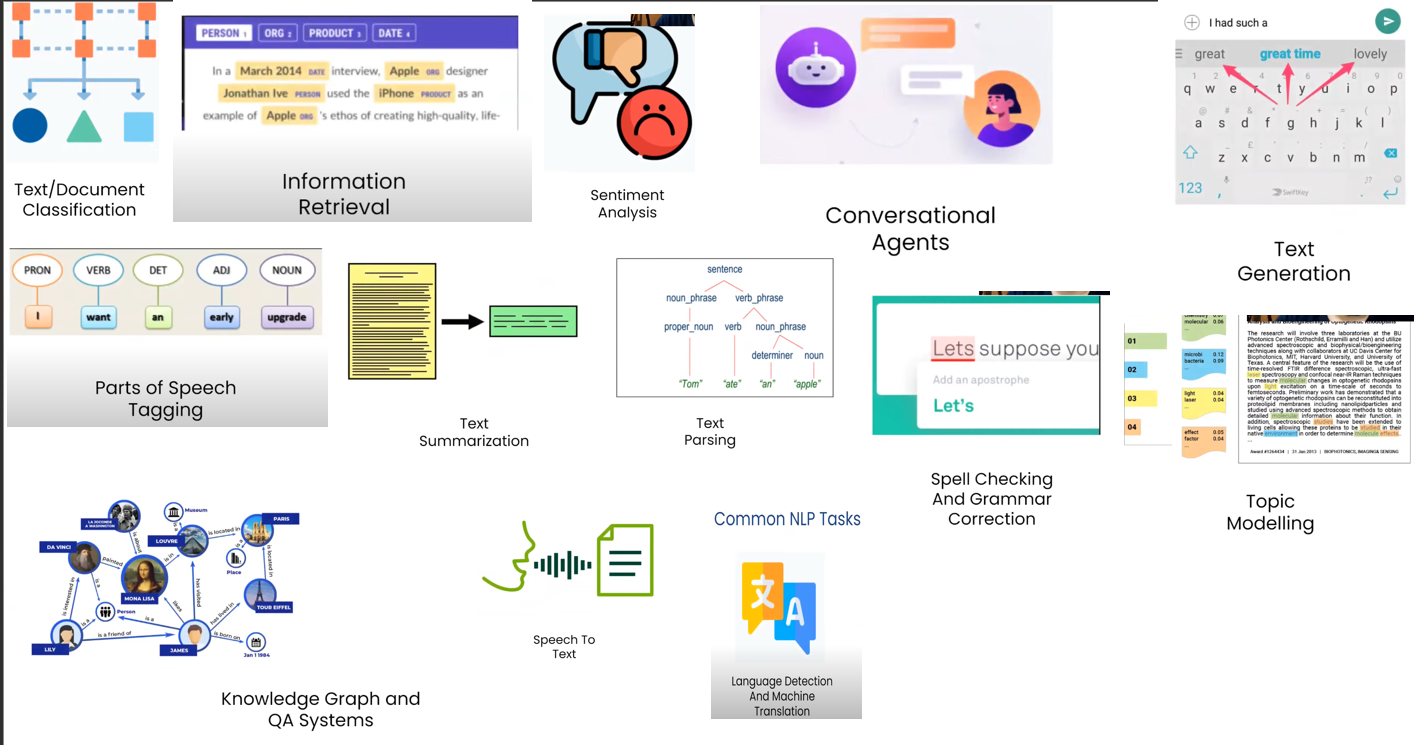

## Approaches to NLP : 

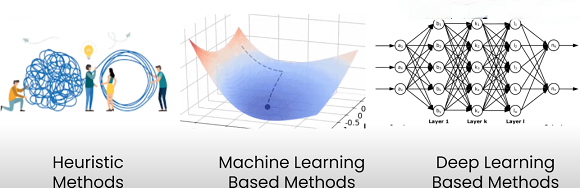

### 1. Heuristic Approach : Jugaad


- Regular Expressions


- Wordnet : relationship of one word to any other word in a dictionary


- Open mind common sense

### 2. Machine learning Approach

- ML workflow


- Algorithms used : Naive Bayes, Logistic Regression, SVM, LDA, Hidden Markov Models

### 3. Deep Learning Approach

- retains Sequence


- models itself does feature generation


- Algorithms used : RNN, LSTM, GRU, BERT, Transformers, Autoencoders

## Challenges in NLP : 

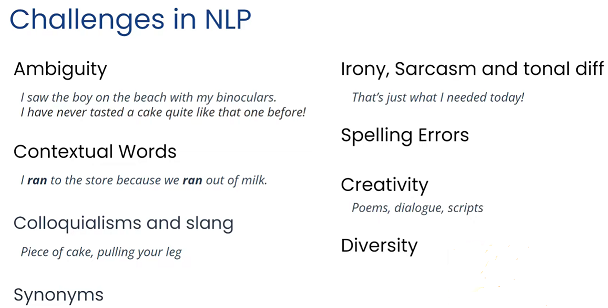

---
---

# Lesson 2 : End to End NLP Pipeline

## NLP Pipeline :  

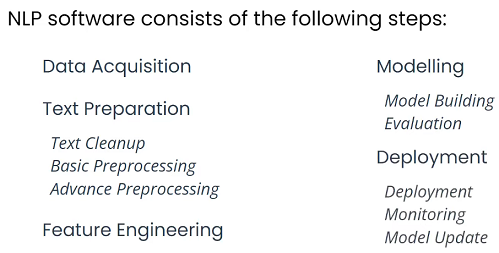

---
---

# Lecture 3 : Text Preprocessing

https://www.youtube.com/watch?v=6C0sLtw5ctc&list=PLKnIA16_RmvZo7fp5kkIth6nRTeQQsjfX&index=3

## 1. Lowercasing


converting entire words into lowercase.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"D:\NLP\datasets\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df['review'] = df['review'].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


## 2. Remove html tags and unwanted characters

- using regex

In [6]:
import re

In [7]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [9]:
df['review'][1]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [10]:
remove_html_tags(df['review'][1])

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [11]:
df['review'] = df['review'].apply(remove_html_tags)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [14]:
df['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

## 3. remove urls

In [19]:
text1 = "While HTTP is widely used for basic website browsing,  Stay safe and visit https://www.examplebank.com."
text2 = "To learn more about check out this informative article: http://www.example.com/blog/why-https-matters."
text3 = "For secure online transactions, make sure visiting websites such as www.example.com."

In [23]:
def remove_urls(text):
    pattern = re.compile('https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [28]:
print(text1)
remove_urls(text1)

While HTTP is widely used for basic website browsing,  Stay safe and visit https://www.examplebank.com.


'While HTTP is widely used for basic website browsing,  Stay safe and visit '

In [29]:
print(text2)
remove_urls(text2)

To learn more about check out this informative article: http://www.example.com/blog/why-https-matters.


'To learn more about check out this informative article: '

In [30]:
print(text3)
remove_urls(text3)

For secure online transactions, make sure visiting websites such as www.example.com.


'For secure online transactions, make sure visiting websites such as '

## 4. removing punctuation marks

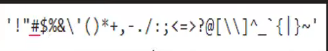

In [1]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
exclude = string.punctuation

In [34]:
def remove_punc(text):
    for char in exclude:
        text= text.replace(char,'')
    return text

In [37]:
text = 'start with !!!!!\\\,,-'

In [38]:
remove_punc(text)

'start with '

### better way : 

In [ ]:
import string
string.punctuation

In [ ]:
exclude = string.punctuation

In [39]:
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [40]:
remove_punc1(text)

'start with '

## 5. Chat word treatment

LOL - Laugh Out Loud

OMG - Oh My God

BRB - Be Right Back

ASAP - As Soon As Possible

FYI - For Your Information

IDK - I Don't Know

BTW - By The Way

IMO - In My Opinion

OMG - Oh My God

TBH - To Be Honest

ROFL - Rolling On the Floor Laughing

TTYL - Talk To You Later

GTG - Got To Go

BFF - Best Friends Forever

IMO - In My Opinion

JK - Just Kidding

NP - No Problem

LMAO - Laughing My Ass Off

SMH - Shaking My Head

TMI - Too Much Information

In [42]:
slangs = {
    "LOL": "Laugh Out Loud",
    "OMG": "Oh My God",
    "BRB": "Be Right Back",
    "ASAP": "As Soon As Possible",
    "FYI": "For Your Information",
    "IDK": "I Don't Know",
    "BTW": "By The Way",
    "IMO": "In My Opinion",
    "TBH": "To Be Honest",
    "ROFL": "Rolling On the Floor Laughing",
    "TTYL": "Talk To You Later",
    "GTG": "Got To Go",
    "BFF": "Best Friends Forever",
    "JK": "Just Kidding",
    "NP": "No Problem",
    "LMAO": "Laughing My Ass Off",
    "SMH": "Shaking My Head",
    "TMI": "Too Much Information",
    "AFK": "Away From Keyboard",
    "OMW": "On My Way",
    "ICYMI": "In Case You Missed It",
    "IRL": "In Real Life",
    "NVM": "Never Mind",
    "TTYN": "Talk To You Never",
    "WYD": "What You Doing",
    "GR8": "Great",
    "FTW": "For The Win",
    "HMU": "Hit Me Up",
    "TBT": "Throwback Thursday",
    "ICYMI": "In Case You Missed It",
    "IMO": "In My Opinion",
    "SMH": "Shaking My Head",
    "AF": "As F**k",
    "YOLO": "You Only Live Once",
    "FWIW": "For What It's Worth"
}


In [43]:
slangs

{'LOL': 'Laugh Out Loud',
 'OMG': 'Oh My God',
 'BRB': 'Be Right Back',
 'ASAP': 'As Soon As Possible',
 'FYI': 'For Your Information',
 'IDK': "I Don't Know",
 'BTW': 'By The Way',
 'IMO': 'In My Opinion',
 'TBH': 'To Be Honest',
 'ROFL': 'Rolling On the Floor Laughing',
 'TTYL': 'Talk To You Later',
 'GTG': 'Got To Go',
 'BFF': 'Best Friends Forever',
 'JK': 'Just Kidding',
 'NP': 'No Problem',
 'LMAO': 'Laughing My Ass Off',
 'SMH': 'Shaking My Head',
 'TMI': 'Too Much Information',
 'AFK': 'Away From Keyboard',
 'OMW': 'On My Way',
 'ICYMI': 'In Case You Missed It',
 'IRL': 'In Real Life',
 'NVM': 'Never Mind',
 'TTYN': 'Talk To You Never',
 'WYD': 'What You Doing',
 'GR8': 'Great',
 'FTW': 'For The Win',
 'HMU': 'Hit Me Up',
 'TBT': 'Throwback Thursday',
 'AF': 'As F**k',
 'YOLO': 'You Only Live Once',
 'FWIW': "For What It's Worth"}

In [57]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in slangs.keys():
            new_text.append(slangs[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [58]:
chat_convo = 'be there lmao'

In [59]:
chat_conversion(chat_convo)

'be there Laughing My Ass Off'

## 6. Spelling correction

In [5]:
import textblob

In [7]:
from textblob import TextBlob

In [9]:
text = 'plase read the notebok'

In [10]:
textBlb = TextBlob(text)
textBlb.correct().string

'place read the notebook'

## 7. Removing stop words

In [11]:
stopwords = [
    "a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "he",
    "in", "is", "it", "its", "of", "on", "that", "the", "to", "was", "were", "will",
    "with"
    # Add more stopwords as needed
]
stopwords

['a',
 'an',
 'and',
 'are',
 'as',
 'at',
 'be',
 'by',
 'for',
 'from',
 'has',
 'he',
 'in',
 'is',
 'it',
 'its',
 'of',
 'on',
 'that',
 'the',
 'to',
 'was',
 'were',
 'will',
 'with']

In [12]:
from nltk.corpus import stopwords

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word.lower()  in stopwords.words('english'):
            pass
            #new_text.append('')
        else:
            new_text.append(word)
            
    x = new_text[:]
    #new_text.clear()
    return " ".join(new_text)

In [27]:
remove_stopwords("I went to the park with my friends and we had a picnic under the big tree.")

'went park friends picnic big tree.'

## 8. Emoji removal

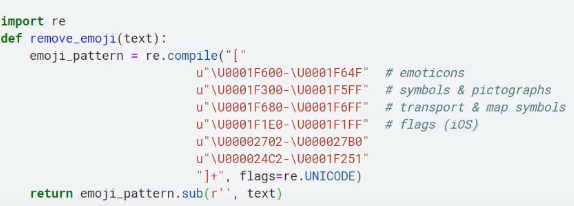

In [28]:
import re

In [35]:
text = "I received some great news today! 😂🔥"
text

'I received some great news today! 😂🔥'

In [36]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                u"\U0001F525" # fire emoji
                                u"\U0001F602" # Face with Tears of Joy 
                               "]+",flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

In [37]:
remove_emoji(text)

'I received some great news today! '

In [39]:
import emoji

In [42]:
print(emoji.demojize('Python is 🔥🎉'))

Python is :fire::party_popper:


## 9. Tokenization

Tokenization in Python refers to the process of breaking down a text or a document into smaller units called tokens. Tokens can be individual words, sentences, or even subwords depending on the level of granularity desired.

#### tokenization problems :

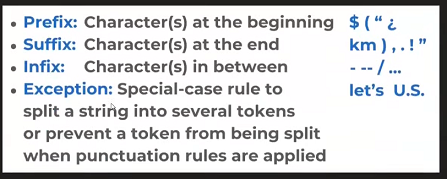

### a. Using the split function

In [43]:
text = 'i am going to delhi'
text.split()

['i', 'am', 'going', 'to', 'delhi']

##### sentence split

In [44]:
sent = 'i am going to delhi. Today is my flight'
sent.split('.')

['i am going to delhi', ' Today is my flight']

##### Problem with split function:

In [46]:
text = 'i am going to delhi!'
text.split()

['i', 'am', 'going', 'to', 'delhi!']

In [47]:
sent = 'am i going to delhi? Today is my flight'
sent.split('.')

['am i going to delhi? Today is my flight']

### b. Use Regular Expressions

In [48]:
import re

In [49]:
text = 'i am going to delhi!'
tokens = re.findall("[\w']+",text)
tokens

['i', 'am', 'going', 'to', 'delhi']

In [50]:
sent = 'am i going to delhi? Today is my flight'
tokens = re.findall("[\w']+",sent)
tokens

['am', 'i', 'going', 'to', 'delhi', 'Today', 'is', 'my', 'flight']

In [51]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
print(text)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


In [52]:
sentences = re.compile('[.!?|] ').split(text)
sentences

['Lorem ipsum dolor sit amet, consectetur adipiscing elit',
 'Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua',
 'Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat',
 'Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur',
 'Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.']

### c. Using NLTK

In [53]:
from nltk.tokenize import word_tokenize, sent_tokenize

##### word tokenization

In [54]:
sent1 = "am i going to delhi?"
word_tokenize(sent1)

['am', 'i', 'going', 'to', 'delhi', '?']

##### sentence tokenization

In [55]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
print(text)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


In [56]:
sent_tokenize(text)

['Lorem ipsum dolor sit amet, consectetur adipiscing elit.',
 'Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.',
 'Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.',
 'Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur.',
 'Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.']

##### failure of nltk

In [58]:
text= "We're working here!"
word_tokenize(text)

['We', "'re", 'working', 'here', '!']

In [60]:
text= "ride of 5km is ahead worth $10.50"
word_tokenize(text)

['ride', 'of', '5km', 'is', 'ahead', 'worth', '$', '10.50']

### d. Spacy : best tokenization

In [1]:
import spacy
import pandas as pd
import numpy as np
import re

In [4]:
nlp = spacy.load('en_core_web_sm')

In [10]:
sent = 'am i going to delhi? Today is my flight'

In [11]:
doc1 = nlp(sent)

In [12]:
for i in doc1:
    print(i)

am
i
going
to
delhi
?
Today
is
my
flight


In [13]:
text= "ride of 5km is ahead worth $10.50"
text

'ride of 5km is ahead worth $10.50'

In [14]:
doc2 = nlp(text)

In [15]:
for i in doc2:
    print(i)
    

ride
of
5
km
is
ahead
worth
$
10.50


In [16]:
text= "We're working here!"
text

"We're working here!"

In [17]:
doc3 = nlp(text)

In [19]:
for i in doc3:
    print(i)
    

We
're
working
here
!


## 10. Stemming : root word

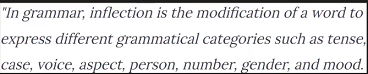

In [20]:
from nltk.stem.porter import PorterStemmer

In [21]:
ps = PorterStemmer()

In [22]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [23]:
sample = 'walk walks walking walked'
stem_words(sample)

'walk walk walk walk'

### Stemming vs Lemmatization

- Stemming aims to reduce a word to its base or root form by removing suffixes or prefixes. The resulting stem may not be a valid word in the language, but it allows for grouping together words with similar meanings. For example, stemming may convert "running," "runs," and "ran" to the common stem "run."


- Lemmatization, on the other hand, transforms words to their canonical or dictionary form, known as the lemma. This process considers the word's part of speech and applies morphological analysis to generate valid lemmas. For instance, lemmatization would convert "running" to the lemma "run," "ran" to "run," and "better" to "good."


- Stemming provides a crude normalization by reducing words to their base forms without considering language rules, while lemmatization aims to produce valid lemmas based on language rules and the word's part of speech. 


- Lemmatization generally yields more accurate and linguistically meaningful results, but it can be computationally more expensive than stemming. The choice between the two depends on the specific requirements and trade-offs of the NLP task at hand.


- User can see output in case of Lemmatization but it is slow.

## 11. Lemmatization

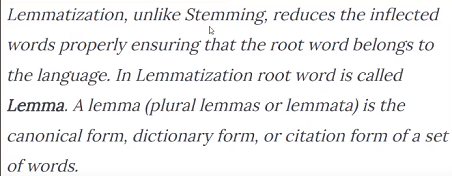

In [33]:
import nltk

In [34]:
from nltk.stem import WordNetLemmatizer

In [42]:
wordnet_lemmatizer = WordNetLemmatizer()

In [43]:
sentence= "He was running and eating at the same time!!. He has this habit after playing in @sun."
punctutations = "?!@#$%^.,/"

In [44]:
sentence_words = nltk.word_tokenize(sentence)

In [47]:
for word in sentence_words:
    if word in punctutations:
        sentence_words.remove(word)
        
sentence_words

['He',
 'was',
 'running',
 'and',
 'eating',
 'at',
 'the',
 'same',
 'time',
 'He',
 'has',
 'this',
 'habit',
 'after',
 'playing',
 'in',
 'sun']

In [50]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


True

In [51]:
print("{0:20}{1:20}".format("Word", "Lemma"))
for word in sentence_words:
    print("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word, pos='v'))) # v is for verb


Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
the                 the                 
same                same                
time                time                
He                  He                  
has                 have                
this                this                
habit               habit               
after               after               
playing             play                
in                  in                  
sun                 sun                 


In [53]:
print("{0:20}{1:20}".format("Word", "Lemma"))
for word in sentence_words:
    print("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word, pos='n'))) # n is for noun


Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
the                 the                 
same                same                
time                time                
He                  He                  
has                 ha                  
this                this                
habit               habit               
after               after               
playing             playing             
in                  in                  
sun                 sun                 
